In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
day_0 = pd.read_csv("prices_round_2_day_-1.csv", sep=";") # day -1
day_1 = pd.read_csv("prices_round_2_day_0.csv", sep=";")
day_2 = pd.read_csv("prices_round_2_day_1.csv", sep=";")

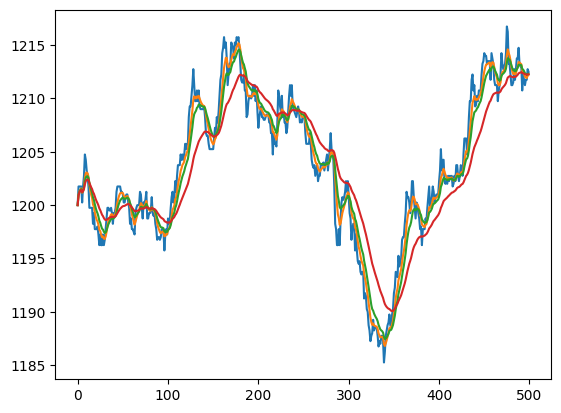

In [3]:
# analyze day 1 orchid price information
window = 3
day_0 = day_0[:500]

day_0[f'ORCHID_EMA_{window}'] = day_0['ORCHIDS'].ewm(window).mean().fillna(0)
day_0[f'ORCHID_EMA_{2*window}'] = day_0['ORCHIDS'].ewm(2*window).mean().fillna(0)
day_0[f'ORCHID_EMA_{6*window}'] = day_0['ORCHIDS'].ewm(6*window).mean().fillna(0)


plt.plot(day_0['ORCHIDS'])
plt.plot(day_0[f'ORCHID_EMA_{window}'])
plt.plot(day_0[f'ORCHID_EMA_{2*window}'])
plt.plot(day_0[f'ORCHID_EMA_{6*window}'])
plt.show()


In [12]:
day_0[f'ORCHID_STDEV_30'] = day_0['ORCHIDS'].rolling(30).std().fillna(0)
print(day_0[:100])

    timestamp  ORCHIDS  TRANSPORT_FEES  EXPORT_TARIFF  IMPORT_TARIFF  \
0           0  1200.00             1.5           10.5           -2.0   
1         100  1201.75             1.5            9.5           -2.0   
2         200  1201.75             1.5            9.5           -2.0   
3         300  1201.75             1.5            9.5           -2.0   
4         400  1201.75             1.5            9.5           -2.0   
..        ...      ...             ...            ...            ...   
95       9500  1197.50             1.4            9.5           -2.2   
96       9600  1195.75             1.4            9.5           -2.2   
97       9700  1197.25             1.4            9.5           -2.2   
98       9800  1197.75             1.4            9.5           -2.2   
99       9900  1197.25             1.4            9.5           -2.2   

     SUNLIGHT  HUMIDITY  DAY  ORCHID_EMA_3  ORCHID_EMA_6  ORCHID_EMA_18  \
0   2500.0000  79.00000   -1   1200.000000   1200.000000    

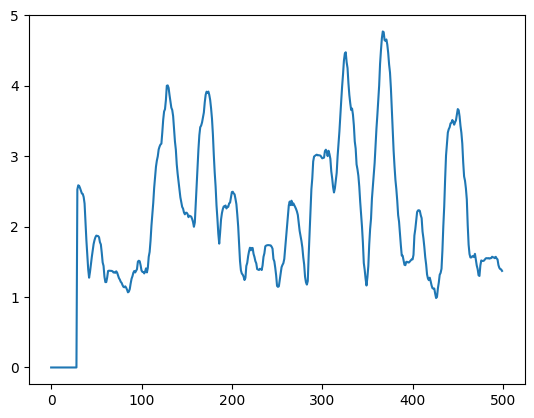

In [13]:
plt.plot(day_0['ORCHID_STDEV_30'])
plt.show()

In [ ]:
plt.plot(day_0['ORCHIDS'])
start_holding = None
end_holding = None
std_above_threshold = day_0['ORCHID_STDEV_30'] > 20
for idx in day_0.index:
    if std_above_threshold[idx] == True:
        if not start_holding:
            start_holding = idx
    else:
        if start_holding:
            end_holding = idx
            # Plot the holding period in red overlay
            plt.axvspan(start_holding, end_holding, color='red', alpha=0.3)

            start_holding = None
            end_holding = None